In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


In [2]:
# Inladen van de data

datasetAdmission = pd.read_csv('StudentAdmission.csv')
datasetAdmission.head()

,Score1,Score2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
y = datasetAdmission.Admission.values
X = np.asarray(datasetAdmission.drop(['Admission'],axis=1))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70, random_state=0)

In [30]:
# trainen van de logistic regression classifier

logreg = linear_model.LogisticRegression(C=1e5,solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [31]:
# testen van de logistic regression classifier

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        31
           1       0.83      1.00      0.91        39

   micro avg       0.89      0.89      0.89        70
   macro avg       0.91      0.87      0.88        70
weighted avg       0.91      0.89      0.88        70

88.57142857142857
[[23  8]
 [ 0 39]]


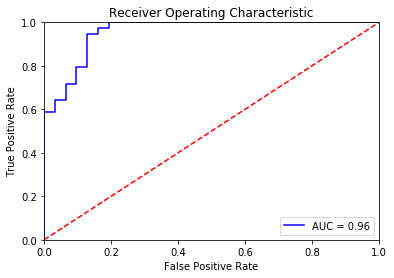

In [32]:
# ROC

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()